In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50
import warnings

In [3]:
def load_data(folder,label):
    images = []
    lab = []
    for file in os.listdir(folder):
        img_path = os.path.join(folder,filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
            lab.append(label)
    return images,lab

normal_image,normal_label = load_data("/kaggle/input/pothole-detection-dataset/normal",0)
pothole_image,pothole_label = load_data("/kaggle/input/pothole-detection-dataset/potholes",1)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/pothole-detection-dataset/normal'

In [ ]:
import cv2
import numpy as np

# Define target image size
TARGET_SIZE = (224, 224)  # Adjust based on your dataset

# Resize all images
normal_image_resized = [cv2.resize(img, TARGET_SIZE) for img in normal_image]
pothole_image_resized = [cv2.resize(img, TARGET_SIZE) for img in pothole_image]

# Convert to NumPy arrays
normal_image_resized = np.array(normal_image_resized)
pothole_image_resized = np.array(pothole_image_resized)

# Now concatenate
X = np.concatenate([normal_image_resized, pothole_image_resized], axis=0)
print("Final Shape:", X.shape)

y = np.concatenate([np.array(normal_label), np.array(pothole_label)], axis=0)

Final Shape: (681, 224, 224, 3)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
baseline_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

baseline_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = baseline_cnn.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - accuracy: 0.7291 - loss: 109.7680 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9267 - loss: 7.1400 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accura

Found 546 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      51,380,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,751,553 (197.42 MB)

 Trainable params: 51,751,553 (197.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 993ms/step - accuracy: 0.5182 - loss: 3.5964 - val_accuracy: 0.7778 - val_loss: 0.6257
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 378ms/step - accuracy: 0.6950 - loss: 0.5739 - val_accuracy: 0.8519 - val_loss: 0.3941
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - accuracy: 0.8505 - loss: 0.3257 - val_accuracy: 0.8296 - val_loss: 0.3728
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 408ms/step - accuracy: 0.8943 - loss: 0.2337 - val_accuracy: 0.8296 - val_loss: 0.5352
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - accuracy: 0.8323 - loss: 0.3617 - val_accuracy: 0.7778 - val_loss: 0.6196
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - accuracy: 0.8740 - loss: 0.3105 - val_accuracy: 0.8148 - val_loss: 0.4341
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 358ms/step - accuracy: 0.9465 - loss: 0.1734 - val_accuracy: 0.8296 - val_loss: 0.3774
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 322ms/step - accuracy: 0.8946 - loss: 0.2208 - val_accuracy: 0.800

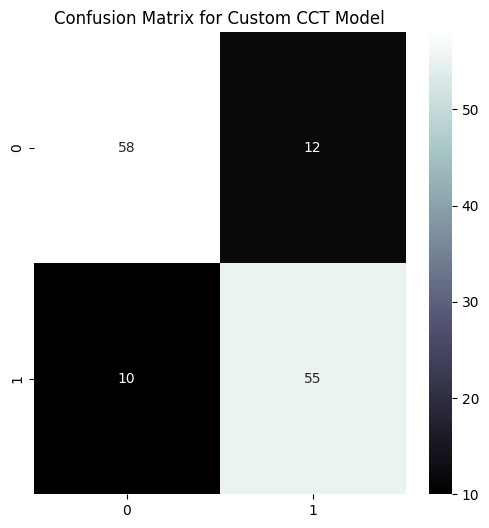

Classification Report for Custom CCT Model:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        70
           1       0.82      0.85      0.83        65

    accuracy                           0.84       135
   macro avg       0.84      0.84      0.84       135
weighted avg       0.84      0.84      0.84       135



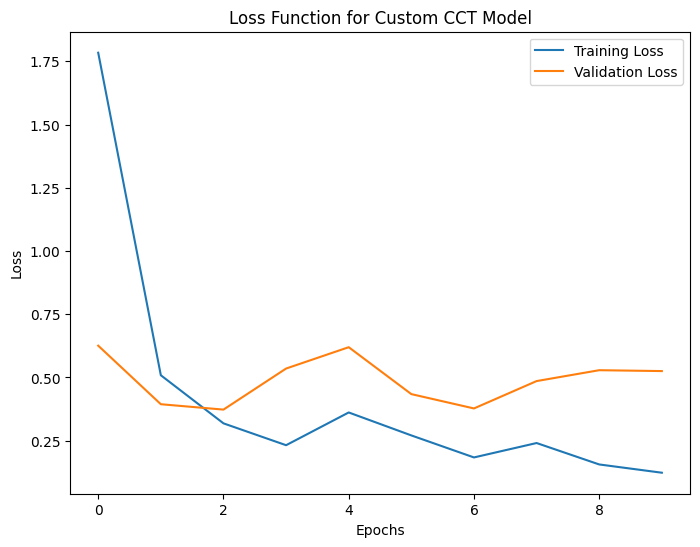

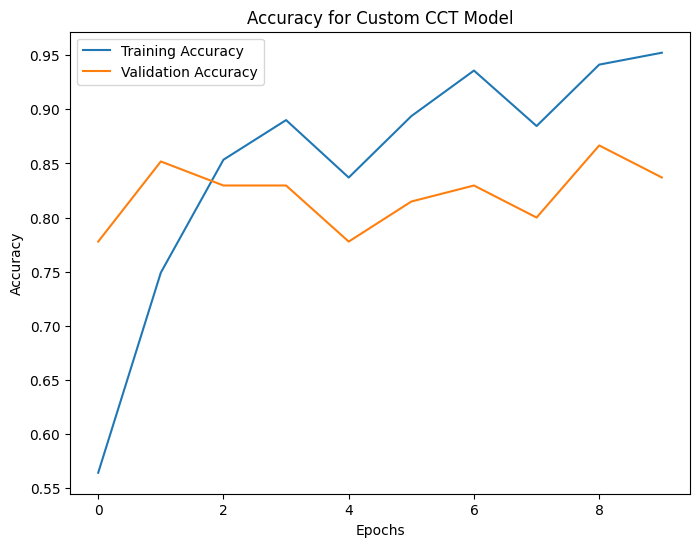

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Paths
normal_path = '/kaggle/input/pothole-detection-dataset/normal'
potholes_path = '/kaggle/input/pothole-detection-dataset/potholes'

# Image preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = datagen.flow_from_directory('/kaggle/input/pothole-detection-dataset/',
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode='binary',
                                        subset='training',
                                        shuffle=True)

val_gen = datagen.flow_from_directory('/kaggle/input/pothole-detection-dataset/',
                                      target_size=(224, 224),
                                      batch_size=32,
                                      class_mode='binary',
                                      subset='validation',
                                      shuffle=False)

# Define a custom CCT model using Keras
def create_custom_cct_model():
    inputs = tf.keras.Input(shape=(224, 224, 3))
    
    # Convolutional layers to extract local features
    x = tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu")(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    
    x = tf.keras.layers.Conv2D(128, kernel_size=3, padding="same", activation="relu")(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    
    x = tf.keras.layers.Conv2D(256, kernel_size=3, padding="same", activation="relu")(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    
    # Flatten and dense layers for classification
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    # Output layer
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    
    # Create model
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build and compile the CCT model
custom_cct_model = create_custom_cct_model()

# Model summary
custom_cct_model.summary()

# Train the model
history = custom_cct_model.fit(train_gen, validation_data=val_gen, epochs=10)

# Predictions
val_pred = custom_cct_model.predict(val_gen)
val_pred_labels = (val_pred > 0.5).astype(int)
y_true = val_gen.classes

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_true, val_pred_labels)
cr = classification_report(y_true, val_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='bone')
plt.title('Confusion Matrix for Custom CCT Model')
plt.show()

# Print classification report
print(f"Classification Report for Custom CCT Model:\n{cr}")

# Plot Loss Function Graph
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function for Custom CCT Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy Graph
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy for Custom CCT Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

In [ ]:
custom_cct_model.save("pothole.h5")